In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from src.Norwood_Circulation_Solver_Functions import flow_pressure_solver_1, flow_pressure_solver_2, saturation_solver
from src.arterial_and_venous_compliance_solver import arterial_and_venous_compliance_solver
from src.systolic_and_diastolic_compliance_solver import systolic_and_diastolic_compliance_solver

In [ ]:
C_sys = 1.4 #mL/mmHg
C_dia = 6 #mL/mmHg
C_A = 1.4
C_V = 6
HR = 140 #Beats per minute
R_s = 7.74 #wood * m^2
R_p = 0.34 #wood * m^2
V_total = 420 #mL, this value is from google 

Hb = 15 #mg/mL, could also be 0.12
CVO2 = 150#mL/min/m^2

EF = 0.75

Q_s, Q_p, P_a, P_v = flow_pressure_solver_1(C_dia, C_sys, C_A, C_V, HR, R_p, R_s, V_total)
S_m, S_sv, OD2 = saturation_solver(Q_s, Q_p, Hb, CVO2)
arterial_and_venous_compliance_solver


Text(0, 0.5, 'S_sv')

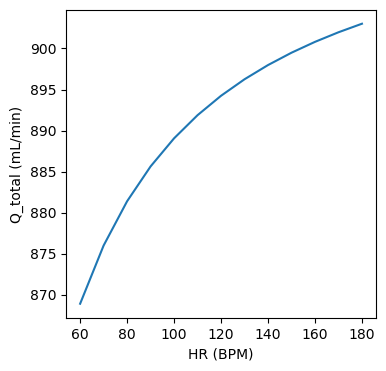

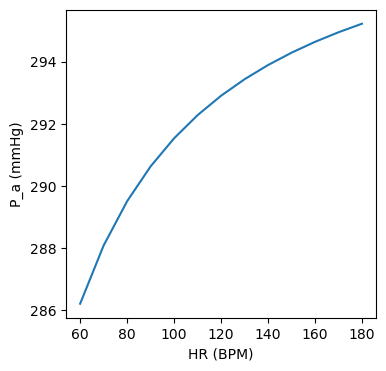

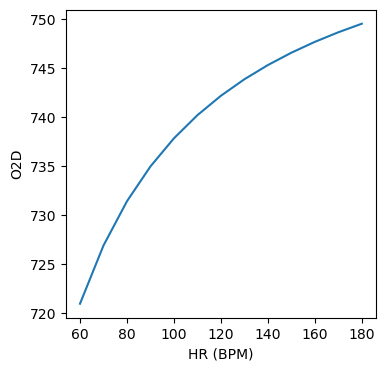

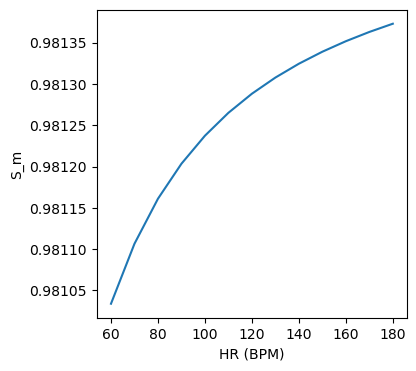

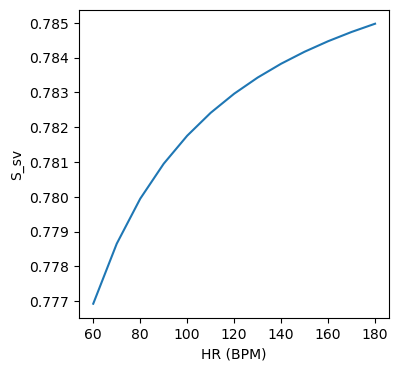

In [ ]:
# plot Q total and arterial pressure as function of HR
# Plot O2D as function of HR
# Plot S_m and S_sv as function of HR

Q_total_list = []
P_a_list = []
O2D_list = []
S_m_list = []
S_sv_list = []
HR_list = np.arange(60, 181, 10)
for hr in HR_list:
    Q_s, Q_p, P_a, P_v = flow_pressure_solver_2(C_dia, C_A, C_V, hr, R_p, R_s, V_total, EF)
    S_m, S_sv, OD2 = saturation_solver(Q_s, Q_p, Hb, CVO2)

    Q_total_list.append(Q_s+Q_p)     
    P_a_list.append(P_a)
    O2D_list.append(OD2)
    S_m_list.append(S_m)
    S_sv_list.append(S_sv)

fig = plt.figure(figsize=(4, 4))
plt.plot(HR_list,Q_total_list)
plt.xlabel('HR (BPM)')
plt.ylabel('Q_total (mL/min)')

fig = plt.figure(figsize=(4, 4))
plt.plot(HR_list,P_a_list)
plt.xlabel('HR (BPM)')
plt.ylabel('P_a (mmHg)')

fig = plt.figure(figsize=(4, 4))
plt.plot(HR_list,O2D_list)
plt.xlabel('HR (BPM)')
plt.ylabel('O2D')

fig = plt.figure(figsize=(4, 4))
plt.plot(HR_list,S_m_list)
plt.xlabel('HR (BPM)')
plt.ylabel('S_m')

fig = plt.figure(figsize=(4, 4))
plt.plot(HR_list,S_sv_list)
plt.xlabel('HR (BPM)')
plt.ylabel('S_sv')

Text(0, 0.5, 'S_sv')

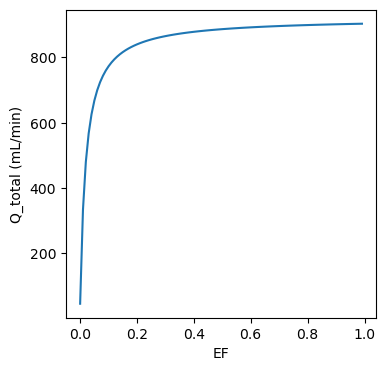

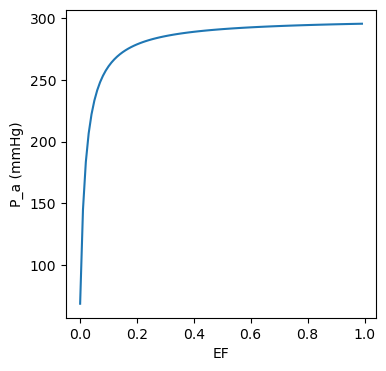

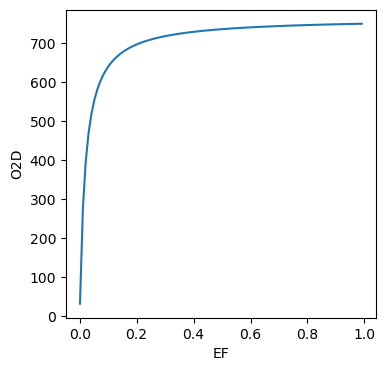

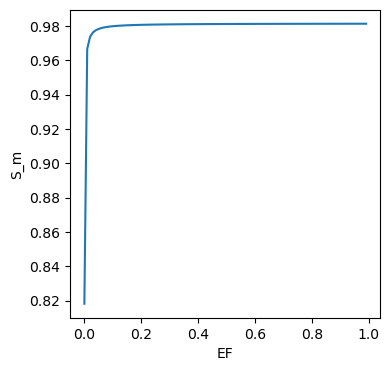

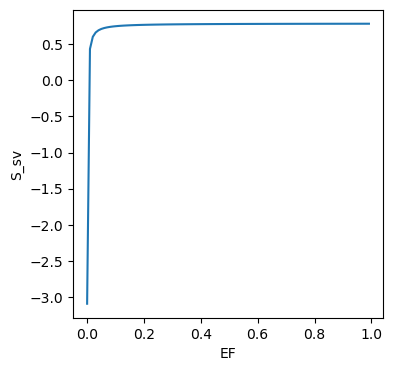

In [ ]:
# plot Q total and arterial pressure as function of EF
# Plot O2D as function of EF
# Plot S_m and S_sv as function of EF

EF_list = np.arange(0.001, 1, 0.01)
Q_total_list = []
P_a_list = []
O2D_list = []
S_m_list = []
S_sv_list = []

for ef in EF_list:
    Q_s, Q_p, P_a, P_v = flow_pressure_solver_2(C_dia, C_A, C_V, HR, R_p, R_s, V_total, ef)
    S_m, S_sv, OD2 = saturation_solver(Q_s, Q_p, Hb, CVO2)

    Q_total_list.append(Q_s+Q_p)     
    P_a_list.append(P_a)
    O2D_list.append(OD2)
    S_m_list.append(S_m)
    S_sv_list.append(S_sv)

fig = plt.figure(figsize=(4, 4))
plt.plot(EF_list,Q_total_list)
plt.xlabel('EF')
plt.ylabel('Q_total (mL/min)')

fig = plt.figure(figsize=(4, 4))
plt.plot(EF_list,P_a_list)
plt.xlabel('EF')
plt.ylabel('P_a (mmHg)')

fig = plt.figure(figsize=(4, 4))
plt.plot(EF_list,O2D_list)
plt.xlabel('EF')
plt.ylabel('O2D')

fig = plt.figure(figsize=(4, 4))
plt.plot(EF_list,S_m_list)
plt.xlabel('EF')
plt.ylabel('S_m')

fig = plt.figure(figsize=(4, 4))
plt.plot(EF_list,S_sv_list)
plt.xlabel('EF')
plt.ylabel('S_sv')



Text(0, 0.5, 'P_a (mmHg)')

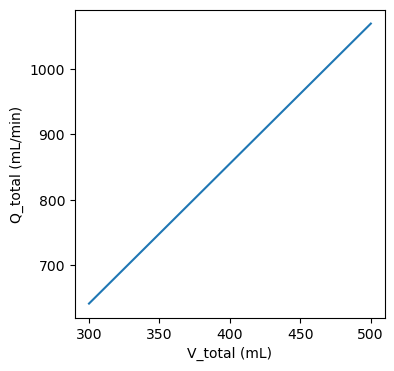

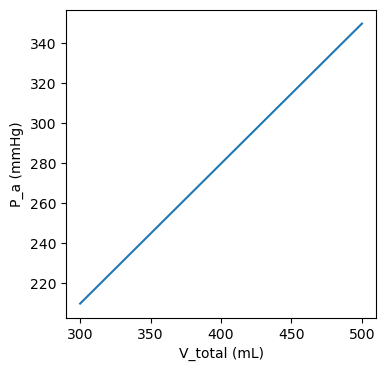

In [ ]:
# plot Q total and arterial pressure as function of V total
V_total_list = np.arange(300, 500.1, 0.10)
Q_total_list = []
P_a_list = []


for vt in V_total_list:
    Q_s, Q_p, P_a, P_v = flow_pressure_solver_2(C_dia, C_A, C_V, HR, R_p, R_s, vt, EF)
    S_m, S_sv, OD2 = saturation_solver(Q_s, Q_p, Hb, CVO2)

    Q_total_list.append(Q_s+Q_p)     
    P_a_list.append(P_a)
    O2D_list.append(OD2)

fig = plt.figure(figsize=(4, 4))
plt.plot(V_total_list,Q_total_list)
plt.xlabel('V_total (mL)')
plt.ylabel('Q_total (mL/min)')

fig = plt.figure(figsize=(4, 4))
plt.plot(V_total_list,P_a_list)
plt.xlabel('V_total (mL)')
plt.ylabel('P_a (mmHg)')



Text(0, 0.5, 'O2D')

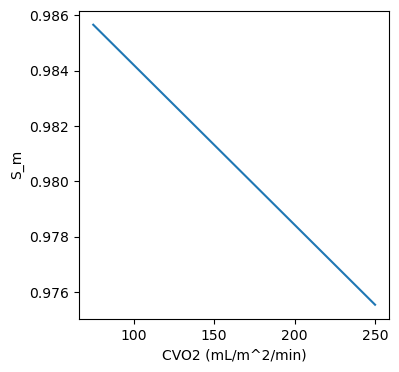

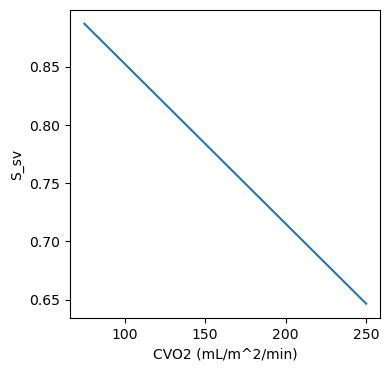

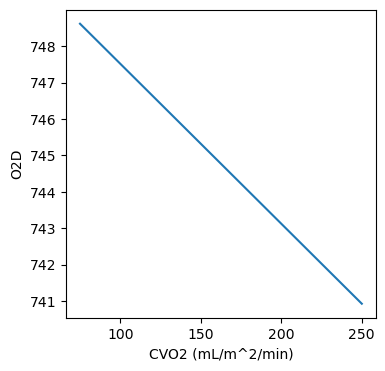

In [ ]:
# Plot S_m and S_sv as function of CVO2
# Plot O2D as function of CVO2

CVO2_list = np.arange(75, 250.1, 0.10)
S_m_list = []
S_sv_list = []
O2D_list = []


for cv in CVO2_list:
    Q_s, Q_p, P_a, P_v = flow_pressure_solver_2(C_dia, C_A, C_V, HR, R_p, R_s, V_total, EF)
    S_m, S_sv, OD2 = saturation_solver(Q_s, Q_p, Hb, cv)

    S_m_list.append(S_m)     
    S_sv_list.append(S_sv)
    O2D_list.append(OD2)

fig = plt.figure(figsize=(4, 4))
plt.plot(CVO2_list,S_m_list)
plt.xlabel('CVO2 (mL/m^2/min)')
plt.ylabel('S_m')

fig = plt.figure(figsize=(4, 4))
plt.plot(CVO2_list,S_sv_list)
plt.xlabel('CVO2 (mL/m^2/min)')
plt.ylabel('S_sv')

fig = plt.figure(figsize=(4, 4))
plt.plot(CVO2_list,O2D_list)
plt.xlabel('CVO2 (mL/m^2/min)')
plt.ylabel('O2D')
